# imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Task 3: Load in the Dataset in your Jupyter Notebook

In [2]:

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url,index_col=0)

In [3]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Task 4: Generate Descriptive Statistics and Visualizations

## Median value of owner-occupied homes (boxplot)

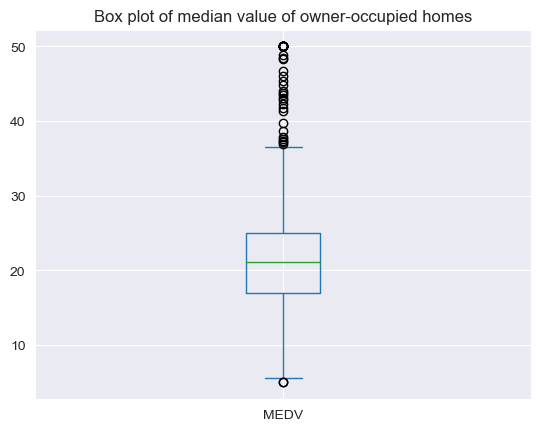

In [4]:
boston_df.MEDV.plot(kind='box',title='Box plot of median value of owner-occupied homes')
plt.show()

##  Bar plot for the Charles river variable

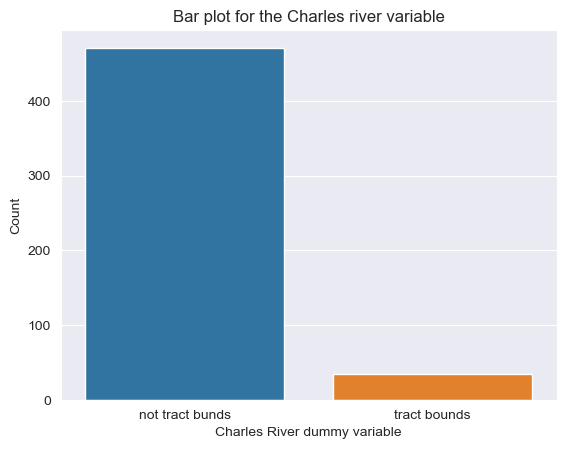

In [5]:

chas=boston_df.CHAS.value_counts().reset_index()
ax=sns.barplot(x=chas['index'].map({0:'not tract bunds',1:'tract bounds'}),y=chas.CHAS)
ax.set_title('Bar plot for the Charles river variable')
ax.set_xlabel('Charles River dummy variable')
ax.set_ylabel('Count')
plt.show()

 ## Boxplot for the MEDV variable vs the AGE variable

In [6]:
def age_discretizer(age):

    if age<=35:
        return 'young'
    elif 35<age<70:
        return 'middle age'
    else:
        return 'old'

In [7]:
boston_df['age_groups']=boston_df.AGE.apply(age_discretizer)

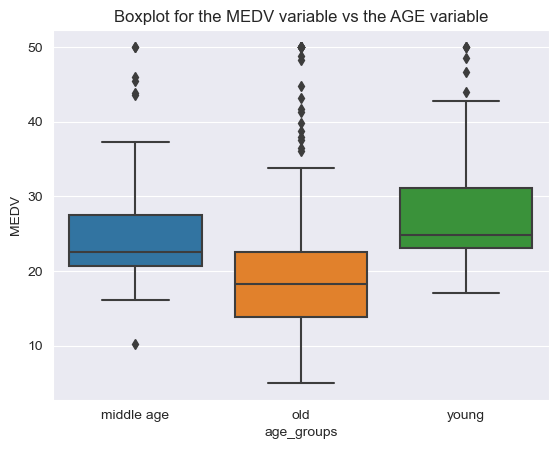

In [8]:
ax=sns.boxplot(data=boston_df,y='MEDV',x='age_groups')
ax.set_title('Boxplot for the MEDV variable vs the AGE variable')
plt.show()

##  Scatter plot of Nitric oxide concentrations and the proportion of non-retail business acres per town

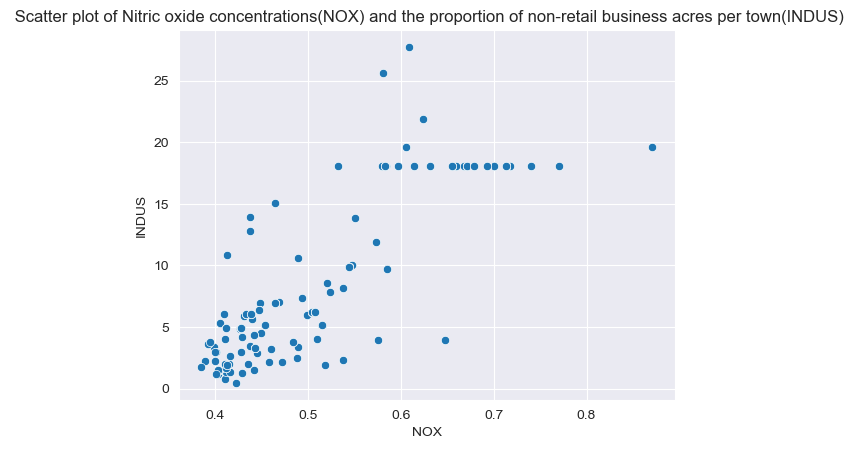

In [9]:
ax=sns.scatterplot(data=boston_df,x='NOX',y='INDUS')
ax.set_title(' Scatter plot of Nitric oxide concentrations(NOX) and the proportion of non-retail business acres per town(INDUS)')
plt.show()

Based on the chart above as nitric oxides concentration increases so does the proportion of non-retail business acres per town. (there is positive correlation between these two variables)

## Histogram for the pupil to teacher ratio variable

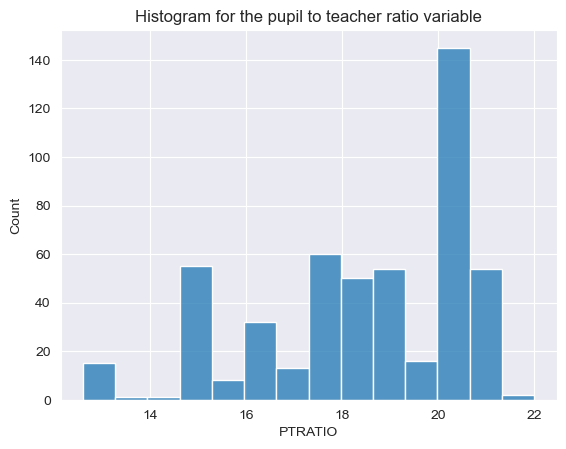

In [10]:
ax=sns.histplot(data=boston_df,x='PTRATIO')
ax.set_title('Histogram for the pupil to teacher ratio variable')
plt.show()

# Task 5: Use the appropriate tests to answer the questions provided

## question 1

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

### hypothesis


*   $H\_0: β1$ = 0 (Being bounded by the Charles river has no effect on median value of owner-occupied homes)
*   $H\_1: β1$ is not equal to 0 (Being bounded by the Charles river has an effect on median value of owner-occupied homes)

In [12]:
import scipy.stats
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

since the p-value is less than 0.05, the variance are not equal


In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

### conclusion

 Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river


## question 2

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [16]:
scipy.stats.levene(boston_df[boston_df['age_groups'] == 'young']['MEDV'],
                   boston_df[boston_df['age_groups'] == 'middle age']['MEDV'],
                   boston_df[boston_df['age_groups'] == 'old']['MEDV'],
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

since the p-value is greater than 0.05 we can assume equality of variance

In [17]:
young = boston_df[boston_df['age_groups'] == 'young']['MEDV']
middle_age = boston_df[boston_df['age_groups'] == 'middle age']['MEDV']
old = boston_df[boston_df['age_groups'] == 'old']['MEDV']

In [18]:
f_statistic, p_value = scipy.stats.f_oneway(young, middle_age, old)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### conclusion

Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

## question 3

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### hypthesis

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [19]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061239593e-98)

### conclusion

 Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

## question 4

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### hypothesis

*   $H\_0: β1$ = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [20]:
import statsmodels.api as sm
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.21e-08
Time:                        18:38:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### conclusion

 Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town